# 1. Data Preparations

In [16]:
import pandas as pd
import os
import cv2

In [11]:
# Tentukan lokasi dataset
dataset_path = 'rps-cv-images'

# Siapkan variabel untuk menampung data-data yang diperlukan
images = []
width = []
height = []
channel = []
label = []

In [12]:
for subfolder in os.listdir(dataset_path):
    subfolder_path = os.path.join(dataset_path, subfolder)
    
    for images_filename in os.listdir(subfolder_path):
        # Mendapatkan direktori dari setiap gambar 
        images_path = os.path.join(subfolder_path, images_filename)

        # Baca gambar
        image = cv2.imread(images_path)

        # Simpan informasi dari setiap gambar
        img_height = image.shape[0]
        img_width = image.shape[1]
        img_channel = image.shape[2]

        # Tampung informasi semua gambar
        images.append(images_path)
        width.append(img_width)
        height.append(img_height)
        channel.append(img_channel)
        label.append(subfolder)

In [14]:
data = {
    'image': images,
    'width': width,
    'height': height,
    'channel': channel,
    'label': label
}

In [18]:
# Buat dataframe
rps_dataframe = pd.DataFrame(data)

rps_dataframe

,image,width,height,channel,label
0,rps-cv-images\paper\04l5I8TqdzF9WDMJ.png,300,200,3,paper
1,rps-cv-images\paper\0a3UtNzl5Ll3sq8K.png,300,200,3,paper
2,rps-cv-images\paper\0cb6cVL8pkfi4wF6.png,300,200,3,paper
3,rps-cv-images\paper\0eqArS2GgsBeqgSn.png,300,200,3,paper
4,rps-cv-images\paper\0Og76sl5CJhbxWWx.png,300,200,3,paper
...,...,...,...,...,...
2183,rps-cv-images\scissors\zV0yCNG0C9s4GId3.png,300,200,3,scissors
2184,rps-cv-images\scissors\zyml8p6mHzWWJTyw.png,300,200,3,scissors
2185,rps-cv-images\scissors\ZyZeKfG5s1J9Qn64.png,300,200,3,scissors
2186,rps-cv-images\scissors\Zz1djgkAdRqsHM3z.png,300,200,3,scissors


# 2. Data Expolorations

In [22]:
total_images = len(rps_dataframe)
total_class = rps_dataframe.label.nunique()

print(f"Ada sebanyak {total_images} gambar dari {total_class} class.")

Ada sebanyak 2188 gambar dari 3 class.


## 2.1. Distribution of Target Class

<Axes: xlabel='label', ylabel='count'>

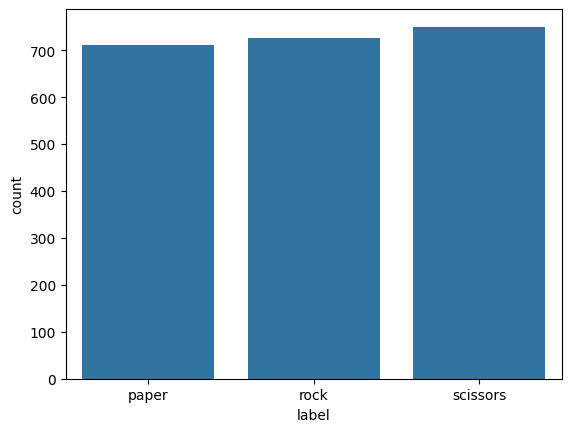

In [23]:
import seaborn as sns

sns.countplot(x = rps_dataframe.label)

# 3. Data Preprocessing

## 3.1. Splitting Data

In [24]:
from sklearn.model_selection import train_test_split

In [27]:
X = rps_dataframe['image']
Y = rps_dataframe['label']

In [30]:
X

0          rps-cv-images\paper\04l5I8TqdzF9WDMJ.png
1          rps-cv-images\paper\0a3UtNzl5Ll3sq8K.png
2          rps-cv-images\paper\0cb6cVL8pkfi4wF6.png
3          rps-cv-images\paper\0eqArS2GgsBeqgSn.png
4          rps-cv-images\paper\0Og76sl5CJhbxWWx.png
                           ...                     
2183    rps-cv-images\scissors\zV0yCNG0C9s4GId3.png
2184    rps-cv-images\scissors\zyml8p6mHzWWJTyw.png
2185    rps-cv-images\scissors\ZyZeKfG5s1J9Qn64.png
2186    rps-cv-images\scissors\Zz1djgkAdRqsHM3z.png
2187    rps-cv-images\scissors\ZzIlyDP6opy9ifkB.png
Name: image, Length: 2188, dtype: object

In [31]:
Y

0          paper
1          paper
2          paper
3          paper
4          paper
          ...   
2183    scissors
2184    scissors
2185    scissors
2186    scissors
2187    scissors
Name: label, Length: 2188, dtype: object

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size = 0.2,
    random_state = 42
)

In [37]:
X_train

552        rps-cv-images\paper\SsvKZDW23vRQMUtA.png
765         rps-cv-images\rock\4vXhIZv7KkPhyfX9.png
479        rps-cv-images\paper\pUCjvjdpH5HSaWxl.png
256        rps-cv-images\paper\fiX6rjBt5qHGMsjc.png
1488    rps-cv-images\scissors\4E0THAnIciVeLK79.png
                           ...                     
1638    rps-cv-images\scissors\EBh8bZgOANio5kQw.png
1095        rps-cv-images\rock\kW4W7E0A1Wpo45eL.png
1130        rps-cv-images\rock\Mhco9qeEh5TV83cQ.png
1294        rps-cv-images\rock\SNEJ1wGU1s9Dm3I1.png
860         rps-cv-images\rock\BMet9oI6hmx1zdc9.png
Name: image, Length: 1750, dtype: object

In [38]:
X_test

571        rps-cv-images\paper\TstngIvuLJt0GIze.png
1317        rps-cv-images\rock\uCt8rigwmrP07ZVr.png
2116    rps-cv-images\scissors\X04PclHUrXo1cF1d.png
1563    rps-cv-images\scissors\aMTILDN4K2ZEjYAx.png
1146        rps-cv-images\rock\N235Vnlue0M9SwaK.png
                           ...                     
861         rps-cv-images\rock\bn4i63wrObqbJECw.png
1376        rps-cv-images\rock\XLXLcpDFWHNVkYQ6.png
162        rps-cv-images\paper\BqGdYFfhQ4sOU5Xl.png
1071        rps-cv-images\rock\jqMSEFiMhpIWzJfe.png
1511    rps-cv-images\scissors\6gt1kvpjTKJIA7S0.png
Name: image, Length: 438, dtype: object

In [39]:
y_train

552        paper
765         rock
479        paper
256        paper
1488    scissors
          ...   
1638    scissors
1095        rock
1130        rock
1294        rock
860         rock
Name: label, Length: 1750, dtype: object

In [40]:
y_test

571        paper
1317        rock
2116    scissors
1563    scissors
1146        rock
          ...   
861         rock
1376        rock
162        paper
1071        rock
1511    scissors
Name: label, Length: 438, dtype: object

In [41]:
# Bagi data train menjadi train dan validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size = 0.1,
    random_state = 42
)

In [42]:
print(f"Total data training {len(X_train)}")
print(f"Total data validation {len(X_val)}")
print(f"Total data test {len(X_test)}")

Total data training 1575
Total data validation 175
Total data test 438


In [43]:
df_train = pd.DataFrame({
    'image': X_train,
    'label': y_train
})

df_val = pd.DataFrame({
    'image': X_val,
    'label': y_val
})

df_test = pd.DataFrame({
    'image': X_test,
    'label': y_test
})

In [44]:
df_train

,image,label
1234,rps-cv-images\rock\QKlibCXvATAv2H4i.png,rock
1984,rps-cv-images\scissors\RQgc9a0ml3hXrJXq.png,scissors
1653,rps-cv-images\scissors\eqJEQe8W9FP4TOck.png,scissors
868,rps-cv-images\rock\brzyLjsQoGb8cmBe.png,rock
819,rps-cv-images\rock\94oKRQFyit6SANlq.png,rock
...,...,...
1980,rps-cv-images\scissors\rOigyekSUNnTrmz6.png,scissors
1978,rps-cv-images\scissors\Rk0jnjn8GxT17vIT.png,scissors
2100,rps-cv-images\scissors\wJNyEIqVDFH8bx5h.png,scissors
1415,rps-cv-images\rock\yxZyXGFCtnDwavIo.png,rock


In [45]:
df_val

,image,label
473,rps-cv-images\paper\pMQfFsmXAu2xZuUv.png,paper
1302,rps-cv-images\rock\tErKQ83tdngWfp23.png,rock
1969,rps-cv-images\scissors\Rc1pRmm4p20kAl7A.png,scissors
60,rps-cv-images\paper\5FVy5hSvZ9c0M2Y5.png,paper
1843,rps-cv-images\scissors\mBHQsHWDcRvtLIKC.png,scissors
...,...,...
577,rps-cv-images\paper\U2InMVDH10R24eOb.png,paper
1757,rps-cv-images\scissors\IZYmxHXE1DVHJfYm.png,scissors
991,rps-cv-images\rock\GRUlZRON6TdcmAOe.png,rock
1997,rps-cv-images\scissors\sC3hanWBPaeGV4xg.png,scissors


In [51]:
df_test

,image,label
571,rps-cv-images\paper\TstngIvuLJt0GIze.png,paper
1317,rps-cv-images\rock\uCt8rigwmrP07ZVr.png,rock
2116,rps-cv-images\scissors\X04PclHUrXo1cF1d.png,scissors
1563,rps-cv-images\scissors\aMTILDN4K2ZEjYAx.png,scissors
1146,rps-cv-images\rock\N235Vnlue0M9SwaK.png,rock
...,...,...
861,rps-cv-images\rock\bn4i63wrObqbJECw.png,rock
1376,rps-cv-images\rock\XLXLcpDFWHNVkYQ6.png,rock
162,rps-cv-images\paper\BqGdYFfhQ4sOU5Xl.png,paper
1071,rps-cv-images\rock\jqMSEFiMhpIWzJfe.png,rock


## 3.2. Image Augmentations

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [49]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 45,
    horizontal_flip = True,
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2 
)

val_datagen = ImageDataGenerator(
    rescale = 1/255
)

test_datagen = ImageDataGenerator(
    rescale = 1/255
)

In [52]:
train = train_datagen.flow_from_dataframe(
    df_train,
    x_col = 'image',
    y_col = 'label',
    target_size = (50, 50),
    batch_size = 64,
    class_mode = 'categorical',
    color_mode = 'grayscale',
    shuffle = True
)


val = val_datagen.flow_from_dataframe(
    df_val,
    x_col = 'image',
    y_col = 'label',
    target_size = (50, 50),
    batch_size = 64,
    class_mode = 'categorical',
    color_mode = 'grayscale',
    shuffle = True
)

test = test_datagen.flow_from_dataframe(
    df_test,
    x_col = 'image',
    y_col = 'label',
    target_size = (50, 50),
    batch_size = 64,
    class_mode = 'categorical',
    color_mode = 'grayscale',
    shuffle = True
)

Found 1575 validated image filenames belonging to 3 classes.
Found 175 validated image filenames belonging to 3 classes.
Found 438 validated image filenames belonging to 3 classes.


In [53]:
train.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [54]:
val.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [55]:
test.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

# 4. Modeling

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

## 4.1. CNN Architecture

In [57]:
model = Sequential()

# Lapisan pertama: input + convulution + relu
model.add(
    Conv2D(32, kernel_size=(3, 3), activation = 'relu', input_shape = (50, 50, 1))
)

# Pooling layer
model.add(
    MaxPool2D(pool_size = (2, 2))
)

# Conv layer
model.add(
    Conv2D(64, kernel_size=(3, 3), activation = 'relu')
)

# Pooling layer
model.add(
    MaxPool2D(pool_size = (2, 2))
)

# Conv layer
model.add(
    Conv2D(128, kernel_size=(3, 3), activation = 'relu')
)

# Pooling layer
model.add(
    MaxPool2D(pool_size = (2, 2))
)

# Conv layer
model.add(
    Conv2D(256, kernel_size=(3, 3), activation = 'relu')
)

# Pooling layer
model.add(
    MaxPool2D(pool_size = (2, 2))
)

# Flatten layer
model.add(
    Flatten()
)

# Hidden layer
model.add(
    Dense(512, activation = 'relu')
)

# Output layer
model.add(
    Dense(3, activation = 'softmax')
)

c:\Users\laode\OneDrive\Documents\Elektrobot\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 4.2. Model Compiling

In [59]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

## 4.3. Model Training

In [62]:
learning_history = model.fit(
    train,
    validation_data = val,
    epochs = 10
)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 790ms/step - accuracy: 0.3673 - loss: 1.0944 - val_accuracy: 0.6286 - val_loss: 0.9840
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 694ms/step - accuracy: 0.5102 - loss: 0.9699 - val_accuracy: 0.7429 - val_loss: 0.5822
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 709ms/step - accuracy: 0.6064 - loss: 0.7797 - val_accuracy: 0.7657 - val_loss: 0.5030
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 881ms/step - accuracy: 0.6090 - loss: 0.7505 - val_accuracy: 0.7429 - val_loss: 0.4679
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 739ms/step - accuracy: 0.6471 - loss: 0.6263 - val_accuracy: 0.8571 - val_loss: 0.4066
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 640ms/step - accuracy: 0.7341 - loss: 0.5743 - val_accuracy: 0.9429 - val_loss: 0.3541
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 581ms/step - accuracy: 0.7836 - loss: 0.5395 - val_accuracy: 0.9486 - val_loss: 0.1971
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 652ms/step - accuracy: 0.8234 - loss: 0.4255 - val_accu

<function matplotlib.pyplot.show(close=None, block=None)>

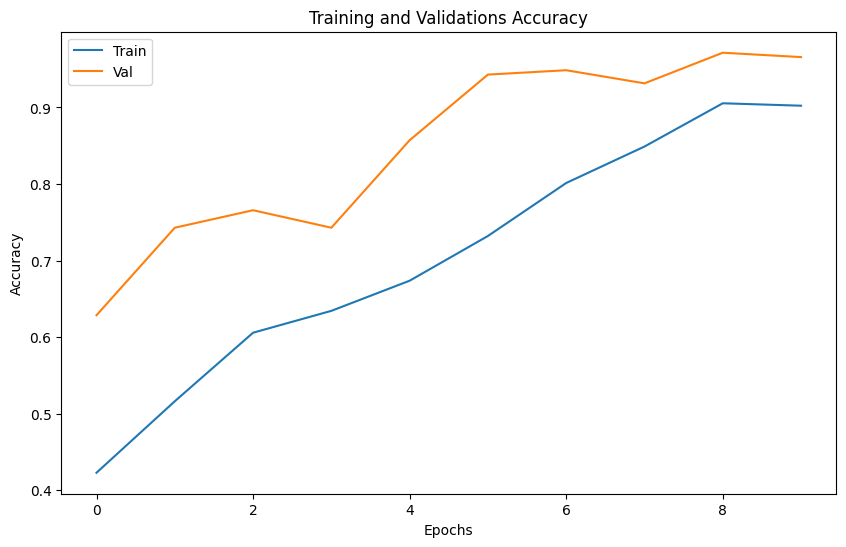

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
plt.plot(learning_history.history['accuracy'])
plt.plot(learning_history.history['val_accuracy'])
plt.title("Training and Validations Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Val'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

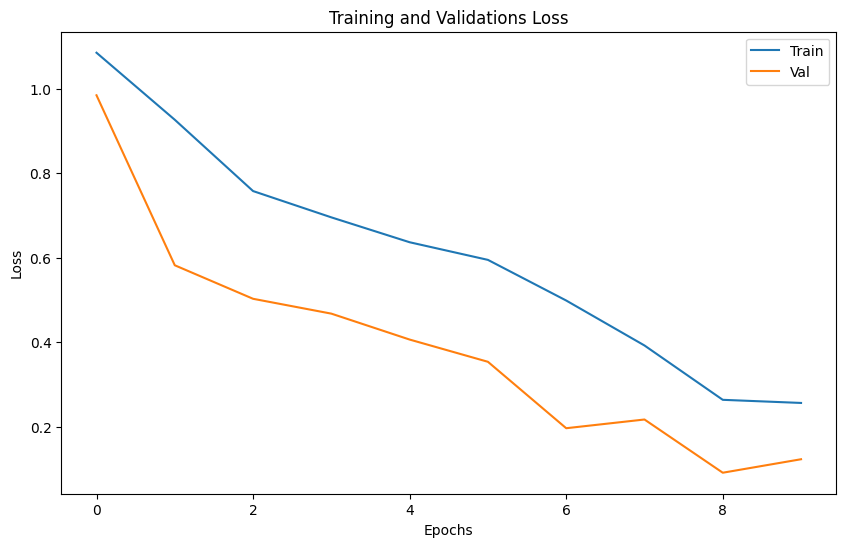

In [64]:
plt.figure(figsize = (10, 6))
plt.plot(learning_history.history['loss'])
plt.plot(learning_history.history['val_loss'])
plt.title("Training and Validations Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train', 'Val'])
plt.show

## 4.3. Model Evaluations

In [65]:
model.evaluate(test)

c:\Users\laode\OneDrive\Documents\Elektrobot\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 757ms/step - accuracy: 0.9742 - loss: 0.1045


[0.1244945079088211, 0.9611872434616089]

## 4.4. Save Model

In [66]:
model.save('rps_classification.keras')

# 5. Prediction

## 5.1. Load model

In [67]:
from tensorflow.keras.models import load_model

model = load_model('rps_classification.keras')

In [68]:
# Lihat arsitektur model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,562,891 (5.96 MB)

 Trainable params: 520,963 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,041,928 (3.97 MB)

In [69]:
import cv2
import numpy as np

In [72]:
image = cv2.imread('scissors.png')

image.shape

(200, 300, 3)

- Sesuaikan kriteria gambar dengan inputan model

In [74]:
# Rubah ukuran gambar
image = cv2.resize(image, (50, 50))

In [75]:
image.shape

(50, 50, 3)

In [76]:
# Rubah menjadi grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

image.shape

(50, 50)

In [77]:
image

array([[83, 83, 83, ..., 88, 85, 83],
       [86, 85, 84, ..., 86, 85, 83],
       [85, 87, 85, ..., 89, 85, 85],
       ...,
       [88, 89, 90, ..., 92, 90, 89],
       [86, 90, 88, ..., 89, 87, 86],
       [87, 89, 87, ..., 91, 88, 86]], dtype=uint8)

In [78]:
# Scaling nilai-nilai pixel pada gambar menjadi angka dengan rentang 0-1
image = image / 255

image

array([[0.3254902 , 0.3254902 , 0.3254902 , ..., 0.34509804, 0.33333333,
        0.3254902 ],
       [0.3372549 , 0.33333333, 0.32941176, ..., 0.3372549 , 0.33333333,
        0.3254902 ],
       [0.33333333, 0.34117647, 0.33333333, ..., 0.34901961, 0.33333333,
        0.33333333],
       ...,
       [0.34509804, 0.34901961, 0.35294118, ..., 0.36078431, 0.35294118,
        0.34901961],
       [0.3372549 , 0.35294118, 0.34509804, ..., 0.34901961, 0.34117647,
        0.3372549 ],
       [0.34117647, 0.34901961, 0.34117647, ..., 0.35686275, 0.34509804,
        0.3372549 ]])

In [79]:
import numpy as np


image = np.expand_dims(image, axis = 0)
image

array([[[0.3254902 , 0.3254902 , 0.3254902 , ..., 0.34509804,
         0.33333333, 0.3254902 ],
        [0.3372549 , 0.33333333, 0.32941176, ..., 0.3372549 ,
         0.33333333, 0.3254902 ],
        [0.33333333, 0.34117647, 0.33333333, ..., 0.34901961,
         0.33333333, 0.33333333],
        ...,
        [0.34509804, 0.34901961, 0.35294118, ..., 0.36078431,
         0.35294118, 0.34901961],
        [0.3372549 , 0.35294118, 0.34509804, ..., 0.34901961,
         0.34117647, 0.3372549 ],
        [0.34117647, 0.34901961, 0.34117647, ..., 0.35686275,
         0.34509804, 0.3372549 ]]])

In [80]:
image.shape

(1, 50, 50)

In [81]:
prediction = model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


In [82]:
prediction

array([[2.7737638e-01, 1.8235331e-05, 7.2260529e-01]], dtype=float32)

In [85]:
prob_paper = prediction[0][0]
prob_rock = prediction[0][1]
prob_scissors = prediction[0][2]

In [86]:
print(prob_paper)
print(prob_rock)
print(prob_scissors)

0.27737638
1.823533e-05
0.7226053


In [87]:
if prob_paper > prob_scissors and prob_paper > prob_rock:
    print("Hasil prediksi : Paper")

elif prob_scissors > prob_paper and prob_scissors > prob_rock:
    print("Hasil prediksi : Scissors")
    
else:
    print("Hasil prediksi : Rock")

Hasil prediksi : Scissors
